# Name = Rohit Solanki
# Roll no = 106
# Sub = Data Visualization - Assignment 1
# Course = Msc CS - sem 7

## Q1 -----------------------

In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Load & Preprocess Dataset
# ------------------------------
df = pd.read_csv("Flipkart-Laptops.csv")

# Clean price columns
for col in ['Actual price', 'Discount price']:
    df[col] = (
        df[col].astype(str)
        .str.replace("₹", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Clean Ratings and Reviews
df['Rating'] = df['Rating'].str.replace(" Ratings", "", regex=False).str.replace(",", "", regex=False)
df['Reviews'] = df['Reviews'].str.replace(" Reviews", "", regex=False).str.replace(",", "", regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean Stars
df['Stars'] = df['Stars'].replace("NIL", np.nan)
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

# Company column
df['Company'] = df['Product Name'].str.split().str[0]

# Fill missing numeric values with median
for col in ['Actual price', 'Discount price', 'Stars', 'Rating', 'Reviews']:
    df[col] = df[col].fillna(df[col].median())


In [58]:

# ------------------------------
# Task 1: First & Last 5 rows
# ------------------------------
print("FIRST 5 ROWS:") 
df.head()

FIRST 5 ROWS:


,Product Name,ProductID,Product image,Actual price,Discount price,Stars,Rating,Reviews,Description,Link,Company
0,MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...,COMGZW35W3DSJADN,#UNKNOWN!,89990.0,54990.0,3.9,7.0,1.0,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,https://www.flipkart.com/msi-cyborg-15-intel-c...,MSI
1,MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...,COMGZW37ZX66DBHF,#UNKNOWN!,83990.0,67990.0,4.2,125.0,15.0,Intel Core i7 Processor (12th Gen)8 GB DDR4 RA...,https://www.flipkart.com/msi-thin-15-intel-cor...,MSI
2,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,COMGJ75HJGFDJ6JN,#UNKNOWN!,49240.0,35660.0,4.2,1805.0,143.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,https://www.flipkart.com/dell-inspiron-3520-in...,DELL
3,Acer One (2024) Intel Core i3 11th Gen 1115G4 ...,COMGPF5CQ7VDWDT4,#UNKNOWN!,43999.0,26990.0,4.2,6977.0,596.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,https://www.flipkart.com/acer-one-2024-intel-c...,Acer
4,Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...,COMGPYKZAWY8UX6C,#UNKNOWN!,59400.0,27989.0,4.2,1263.0,113.0,AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,https://www.flipkart.com/lenovo-v15-amd-ryzen-...,Lenovo


In [59]:
print("LAST 5 ROWS:")
df.tail()

LAST 5 ROWS:


,Product Name,ProductID,Product image,Actual price,Discount price,Stars,Rating,Reviews,Description,Link,Company
955,Acer Swift Go 14 (2024) AI Powered EVO Intel C...,COMGWKF2VKGAVHDU,#UNKNOWN!,129999.0,79990.0,4.1,108.0,16.0,Intel Core Ultra 5 Processor16 GB LPDDR5X RAMW...,https://www.flipkart.com/acer-swift-go-14-2024...,Acer
956,HP Victus Intel Core i5 12th Gen 12450H - (16 ...,COMH2DYZHMHZ5UPG,#UNKNOWN!,69890.0,82414.0,4.2,125.0,15.0,Intel Core i5 Processor (12th Gen)16 GB DDR4 R...,https://www.flipkart.com/hp-victus-intel-core-...,HP
957,Infinix X1 Slim Series (2024) Intel Core i3 10...,COMGEHP5EFEGWZW5,#UNKNOWN!,49999.0,32990.0,4.3,3897.0,457.0,Intel Core i3 Processor (10th Gen)8 GB LPDDR4X...,https://www.flipkart.com/infinix-x1-slim-serie...,Infinix
958,Lenovo IdeaPad Slim 3 Intel Core i5 12th Gen 1...,COMGYHP5ZB4AGZH6,#UNKNOWN!,69890.0,53390.0,3.8,53.0,5.0,Intel Core i5 Processor (12th Gen)16 GB LPDDR5...,https://www.flipkart.com/lenovo-ideapad-slim-3...,Lenovo
959,HP (15s-fq5007TU) Intel Core i3 12th Gen 1215U...,COMGYHP5MCEYZHSV,#UNKNOWN!,51134.0,38990.0,4.2,5540.0,485.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,https://www.flipkart.com/hp-15s-fq5007tu-intel...,HP


In [60]:

# ------------------------------
# Task 2: Total sales by Company
# ------------------------------
total_sales = df.groupby("Company")["Discount price"].sum().sort_values(ascending=False)
print("TOTAL SALES BY COMPANY:")
total_sales

TOTAL SALES BY COMPANY:


Company
MSI          12109351.0
HP           11593867.0
Lenovo        8872180.0
ASUS          7938124.0
Acer          3210626.0
Thomson       2833636.0
DELL          1969053.0
Apple         1182600.0
SAMSUNG       1051880.0
MICROSOFT      968940.0
Infinix        863511.0
Colorful       509940.0
ZEBRONICS      259930.0
Avita          108462.0
realme          99989.0
CHUWI           96950.0
GIGABYTE        63990.0
Vaio            45042.0
Ultimus         37989.0
Mi              37052.0
AXL             17990.0
Primebook       15990.0
Name: Discount price, dtype: float64

In [61]:

# ------------------------------
# Task 3: Products between 50k & 80k
# ------------------------------
products_50k_80k = df.loc[(df["Discount price"] > 50000) & (df["Discount price"] < 80000), "Product Name"]
print("PRODUCTS BETWEEN 50k-80k:")
products_50k_80k

PRODUCTS BETWEEN 50k-80k:


0      MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...
1      MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...
8      Acer Swift Go 14 EVO OLED Intel Core i5 13th G...
21     MSI Claw Intel Core Ultra 5 135H - (16 GB/512 ...
28     ASUS TUF Gaming F15 - AI Powered Gaming Intel ...
                             ...                        
951    HP Pavilion AMD Ryzen 5 Hexa Core AMD R5-5600H...
953    MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...
954    Acer Predator Helios 300 (2024) Intel Core i7 ...
955    Acer Swift Go 14 (2024) AI Powered EVO Intel C...
958    Lenovo IdeaPad Slim 3 Intel Core i5 12th Gen 1...
Name: Product Name, Length: 333, dtype: object

In [62]:

# ------------------------------
# Task 4: Count products with >3000 ratings
# ------------------------------
count_3000_ratings = (df["Rating"] > 3000).sum()
print("PRODUCTS WITH >3000 RATINGS:")
count_3000_ratings

PRODUCTS WITH >3000 RATINGS:


159

In [63]:

# ------------------------------
# Task 5: Product with Max & Min reviews
# ------------------------------
max_reviews_product = df.loc[df["Reviews"].idxmax(), ["Product Name", "Reviews"]]
min_reviews_product = df.loc[df["Reviews"].idxmin(), ["Product Name", "Reviews"]]
print("MAX REVIEWS PRODUCT:\n", max_reviews_product)
print("MIN REVIEWS PRODUCT:\n", min_reviews_product)


MAX REVIEWS PRODUCT:
 Product Name    realme Book(Slim) Intel Evo Intel Core i5 11th...
Reviews                                                    1042.0
Name: 419, dtype: object
MIN REVIEWS PRODUCT:
 Product Name    Lenovo AMD Ryzen 3 Quad Core 7330U - (8 GB/512...
Reviews                                                       0.0
Name: 5, dtype: object


In [64]:

# ------------------------------
# Task 6: Statistical analysis of discount prices
# ------------------------------
print("DISCOUNT PRICE STATISTICS:")
df["Discount price"].describe()


DISCOUNT PRICE STATISTICS:


count       960.000000
mean      56132.387500
std       33430.684551
min       10990.000000
25%       35990.000000
50%       48990.000000
75%       67115.000000
max      439990.000000
Name: Discount price, dtype: float64

In [65]:

# ------------------------------
# Task 7: Rating Categorization
# ------------------------------
rating_categories = {
    "Poor (1-2)": ((df["Stars"] >= 1) & (df["Stars"] < 2)).sum(),
    "Average (2-3)": ((df["Stars"] >= 2) & (df["Stars"] < 3)).sum(),
    "Good (3-4)": ((df["Stars"] >= 3) & (df["Stars"] < 4)).sum(),
    "Excellent (4-5)": ((df["Stars"] >= 4) & (df["Stars"] <= 5)).sum(),
}
print("RATING CATEGORIES:\n")
rating_categories


RATING CATEGORIES:



{'Poor (1-2)': 0,
 'Average (2-3)': 9,
 'Good (3-4)': 161,
 'Excellent (4-5)': 790}

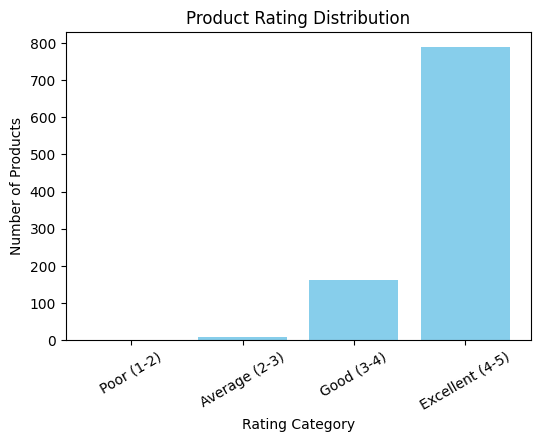

In [66]:

# ------------------------------
# Visualization
# ------------------------------
plt.figure(figsize=(6,4))
plt.bar(rating_categories.keys(), rating_categories.values(), color="skyblue")
plt.title("Product Rating Distribution")
plt.xlabel("Rating Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=30)
plt.show()

## q 2---------------

In [68]:

# ------------------------------
# Question 2 : Airlines Flights Data
# ------------------------------

airlines = pd.read_csv("airlines_flights_data.csv")

# 1. Shape
print("Shape:", airlines.shape)

Shape: (300153, 12)


In [69]:
# 2. Null values
print("Nulls:")
airlines.isnull().sum()

Nulls:


index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [70]:
# 3. Basic statistics
print("Statistics:")
airlines.describe()

Statistics:


,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [71]:
# 4. Top 5 airlines
print("Top Airlines:")
airlines["airline"].value_counts().head()

Top Airlines:


Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
Name: airline, dtype: int64

In [72]:

# 5. Average price per airline
print("Average Price per Airline:") 
airlines.groupby("airline")["price"].mean()


Average Price per Airline:


airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

In [73]:

# 6. Cheapest and costliest flight
min_f = airlines.loc[airlines["price"].idxmin()]
max_f = airlines.loc[airlines["price"].idxmax()]
print("Cheapest Flight:", min_f["airline"], min_f["price"])
print("Costliest Flight:", max_f["airline"], max_f["price"])


Cheapest Flight: AirAsia 1105
Costliest Flight: Vistara 123071


In [74]:
# 7. Flights per source city
print("Flights per Source City:")
airlines["source_city"].value_counts()

Flights per Source City:


Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [75]:

# 8. Flights per destination city
print("Flights per Destination City:")
airlines["destination_city"].value_counts()


Flights per Destination City:


Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [76]:

# 9. Flights per class
print("Flights per Class:")
airlines["class"].value_counts()


Flights per Class:


Economy     206666
Business     93487
Name: class, dtype: int64

In [77]:

# 10. Average price by class
print("Average Price by Class:")
airlines.groupby("class")["price"].mean()


Average Price by Class:


class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

In [78]:

# 11. Average price by number of stops
print("Average Price by Stops:")
airlines.groupby("stops")["price"].mean()


Average Price by Stops:


stops
one            22900.992482
two_or_more    14113.450775
zero            9375.938535
Name: price, dtype: float64

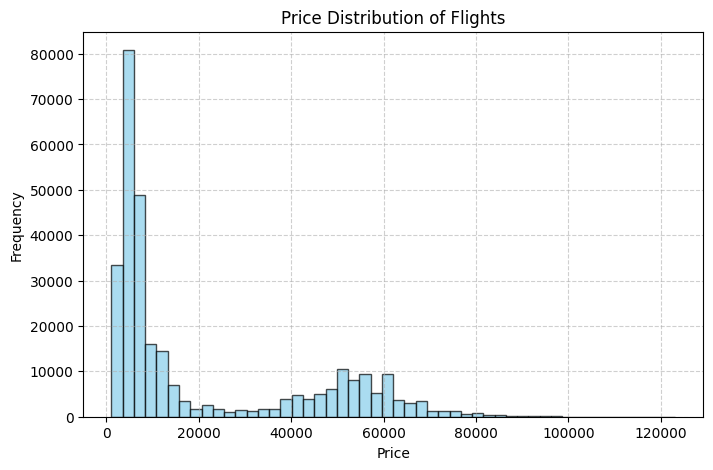

In [79]:

plt.figure(figsize=(8,5))
plt.hist(airlines["price"], bins=50, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Price Distribution of Flights")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()